In [1]:
import pandas as pd
import numpy as np

In [2]:
d1  = pd.read_csv('../data/D1.csv', low_memory=False)

In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              50031 non-null  int64 
 1   patient_nbr               50031 non-null  int64 
 2   race                      50031 non-null  object
 3   gender                    50031 non-null  object
 4   age                       50031 non-null  object
 5   weight                    50031 non-null  object
 6   admission_type_id         50031 non-null  int64 
 7   discharge_disposition_id  50031 non-null  int64 
 8   admission_source_id       50031 non-null  int64 
 9   length_of_stay            50031 non-null  int64 
 10  payer_code                50031 non-null  object
 11  medical_specialty         50031 non-null  object
 12  num_lab_procedures        50031 non-null  int64 
 13  num_procedures            50031 non-null  int64 
 14  num_medications       

In [4]:
d1.gender.value_counts(dropna=False)

gender
Female             27000
Male               23030
Unknown/Invalid        1
Name: count, dtype: int64

In [5]:
d1.weight.value_counts(dropna=False)

weight
?            48169
[75-100)       794
[50-75)        550
[100-125)      316
[125-150)       73
[25-50)         68
[0-25)          37
[150-175)       17
[175-200)        6
>200             1
Name: count, dtype: int64

In [6]:
d1.number_emergency.value_counts(dropna=False)

number_emergency
0     46185
1      2629
2       644
3       232
4       132
?        69
5        45
6        27
7        24
8        16
9        10
10        8
11        3
22        2
25        1
13        1
42        1
16        1
28        1
Name: count, dtype: int64

Make a copy of the original dataframe to correct the mismatched variables

In [7]:
d1_copy = d1.copy(deep=True)

Fix up the mismatched data

In [8]:
d1_copy['number_outpatient'] = d1_copy['number_outpatient'].replace('?', np.nan).astype('Int64')
d1_copy['number_emergency'] = d1_copy['number_emergency'].replace('?', np.nan).astype('Int64')
d1_copy['number_inpatient'] = d1_copy['number_emergency'].replace('?', np.nan).astype('Int64')


In [9]:
d1_copy[['number_outpatient', 'number_emergency', 'number_inpatient']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   number_outpatient  50011 non-null  Int64
 1   number_emergency   49962 non-null  Int64
 2   number_inpatient   49962 non-null  Int64
dtypes: Int64(3)
memory usage: 1.3 MB


### Task 2 - EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
d1.isna().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
length_of_stay                  0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
diabetes                        0
max_glu_serum               45392
A1Cresult                   42418
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [12]:
numeric_cols = d1_copy.select_dtypes(include=['Int64'])

Ignore the encounter_id and patient_nbr columns. Also the admission_type_id, discharge_disposition_id, and admission_source_id as these are reference keys for categorical variables in lookup tables 


In [13]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50031 entries, 0 to 50030
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   encounter_id              50031 non-null  int64
 1   patient_nbr               50031 non-null  int64
 2   admission_type_id         50031 non-null  int64
 3   discharge_disposition_id  50031 non-null  int64
 4   admission_source_id       50031 non-null  int64
 5   length_of_stay            50031 non-null  int64
 6   num_lab_procedures        50031 non-null  int64
 7   num_procedures            50031 non-null  int64
 8   num_medications           50031 non-null  int64
 9   number_outpatient         50011 non-null  Int64
 10  number_emergency          49962 non-null  Int64
 11  number_inpatient          49962 non-null  Int64
 12  number_diagnoses          50031 non-null  int64
dtypes: Int64(3), int64(10)
memory usage: 5.1 MB


In [14]:
d1_numeric = d1_copy[['length_of_stay', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses']]

<Axes: xlabel='length_of_stay', ylabel='Count'>

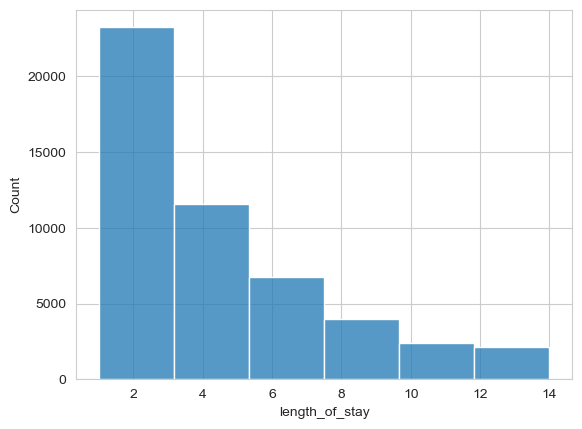

In [15]:
sns.histplot(d1['length_of_stay'], bins=6)

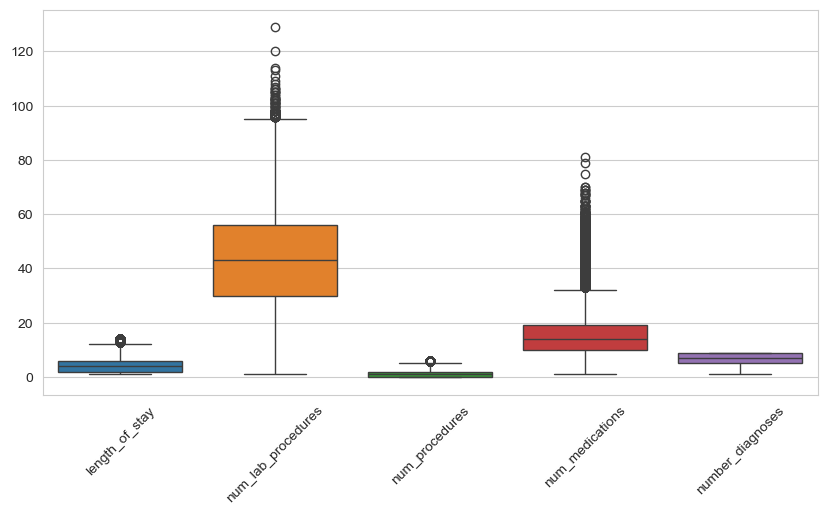

In [19]:
# make an IQR with sns using the d1_numeric dataframe
plt.figure(figsize=(10, 5))
sns.boxplot(data=d1_numeric)
plt.xticks(rotation=45)
plt.show()
